Accuracy:  77.39


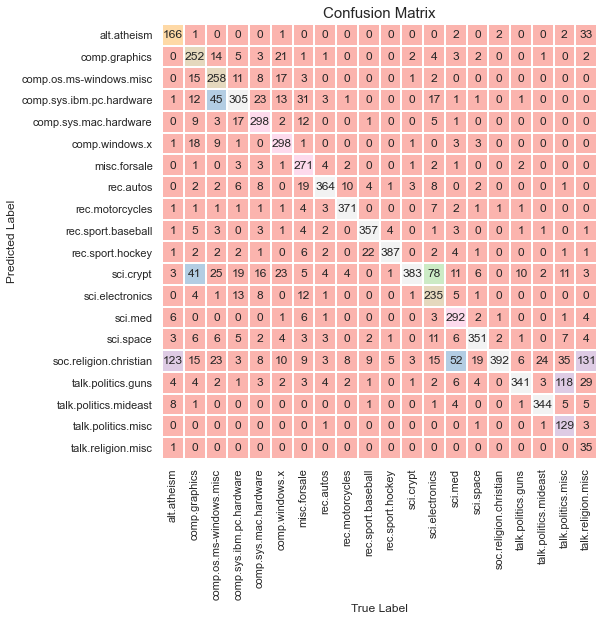

'soc.religion.christian'

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acs

#get data and split into test and train
data = fetch_20newsgroups()
train = fetch_20newsgroups(subset='train', categories=data.target_names)
test = fetch_20newsgroups(subset='test', categories=data.target_names)


#create Naive Bayes model
NB_model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#train model
NB_model.fit(train.data, train.target)

#infering the test data
prediction = NB_model.predict(test.data)

#Show accuracy and the Confusion matrix
print('Accuracy: ', round(acs(prediction, test.target), 4)*100)

#create the confusion matrix heat map
cm=confusion_matrix(prediction, test.target)
fig=plt.figure(figsize=(12,8))
sns.heatmap(cm, square=True, annot=True,cmap='Pastel1',linewidths=2,fmt='d', 
            cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, robust=True)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()



#Now you can classify any new text 
def predict_new_text(s, train=train, model=NB_model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

predict_new_text('Jesus Christ is Lord of all.')